# IMDB Data Visualization

## Projeto da disciplina **SSC0252 - Visualização Computacional**

* Arthur Santorum Lorenzetto - arts.lorenzetto@usp.br - 12559465

* Lucas Ivars Cadima Ciziks - luciziks@usp.br - 12559472

* Gustavo Silva de Oliveira - guspfc03@usp.br - 12567231

---

# 1. Introdução

O conjunto de dados ***IMDB Movies*** é uma valiosa fonte de informações para pesquisadores do mundo cinematográfico. Composta por uma seleção dos 1000 filmes mais bem avaliados na plataforma IMDB, essa base oferece uma visão abrangente das tendências culturais. Cada filme na base possui atributos interessantes, como o título do filme, os gêneros a que pertencem, o *rating* no IMDB e seu ano de lançamento, proporcionando assim um conjunto de dados robusto que pode ser utilizado para análises de tendências audiovisuais, pesquisas culturais e até mesmo em sistemas de recomendações. A riqueza de informações contidas nessa base de dados a torna uma ferramenta indispensável para explorar e compreender a evolução do cinema ao longo das décadas.

---

# 2. Compreensão dos Dados

O projeto está armazenado no respositório disponível em [Github](https://github.com/ciziks/IMDB-data-visualization).

## 2.1. Coleta dos Dados

O conjunto de dados utilizado para a análise do projeto foi extraído da plataforma Kaggle, disponível em [IMDB Movies Dataset](https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows). Os dados se referem às 1000 produções audiovisuais com maior nota no site [IMDB](https://www.imdb.com).

## 2.2. Dicionário de Dados

* **Series_Title**: Nome do Filme;

* **Released_Year** - Ano de lançamento do Filme;

* **Certificate** - Certificado do Filme;

* **Runtime** - Duração total do Filme;

* **Genre** - Gêneros do Filme;

* **IMDB_Rating** - Nota do Filme no site do IMDB (0 - 10);

* **Overview** - Sinopse do Filme;

* **Meta_score** - Nota do Filme no site do MetaCritic (0 - 100);

* **Director** - Nome do Diretor;

* **Star1, Star2, Star3, Star4** - Nome dos atores que estrelaram o Filme;

* **No_of_votes** - Número de votos do Filme;

* **Gross** - Arrecadação do Filme;

* **Poster_Link** - Link do poster do Filme no IMDB.

## 2.3. Tipo das Variáveis

* **Variáveis Qualitativas**
    * Ordinais
        * Released_Year;
        * Certificate.

    * Nominais:
        * Series_Title;
        * Genre;
        * Overview;
        * Director;
        * Star1, Star2, Star3, Star4.



* **Variáveis Quantitativas**:
    * Discretas:
        * Runtime;
        * Meta_score;
        * No_of_Votes.

    * Contínuas:
        * IMDB_Rating;
        * Gross.

## 2.4. Questionamentos Iniciais

* Como as características (duração, gênero, classificação indicativa, etc...) dos filmes no Top 1000 estão distribuídas?

* Como os filmes do Top 1000 estãos distríbuidos no decorrer dos anos?

* Quais diretores estão associados aos maiores *ratings*?

* Que diretores mais arrecadaram com seus filmes?

* Existe uma correlação da duração do filme com sua arrecadação?

* Como o *rating* do filme está correlacionado com sua arrecadação (*gross*)?

* Quais as palavras mais comuns nas sinopses dos filmes?

* Existe uma correlação entre a nota no IMDB e o MetaScore?

* Qual nota explica melhor a arrecadação do filme: IMDB ou MetaCritic?

* Qual combinação de atores apresentam os melhores resultados de bilheteria?

---

# 3. Tratamento dos Dados

In [163]:
# Importando Bibliotecas
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import locale
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [164]:
# Coletando Base de Dados
df = pd.read_csv("./imdb_top_1000.csv")
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [165]:
df.loc[df["Released_Year"] == 79]

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross


In [166]:
# Visualizando colunas
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [167]:
# Verificando Tipos das Colunas
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year      int64
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [168]:
# Removendo coluna do Poster (Desinteressante à Análise)
df.drop(columns=['Poster_Link'], inplace = True)

In [169]:
# Transformando Gross em um valor numérico
def gross_to_numeric(gross):
    if isinstance(gross, str):
        return float("".join(re.findall(r"\d", gross)))
    return gross

df["Gross"] = df["Gross"].apply(gross_to_numeric)

In [170]:
# 286 Filmes com valores nulos
len(df[df.isna().any(axis=1)])

286

In [171]:
# As Colunas onde há valores NaN são: Certificate, Meta_score, Gross
df[df.columns[df.isna().any()]]

,Certificate,Meta_score,Gross
0,A,80.0,28341469.0
1,A,100.0,134966411.0
2,UA,84.0,534858444.0
3,A,90.0,57300000.0
4,U,96.0,4360000.0
...,...,...,...
995,A,76.0,NaN
996,G,84.0,NaN
997,Passed,85.0,30500000.0
998,NaN,78.0,NaN


In [172]:
# Imputando valoes NaN do Meta_Score como a mediana (outliers não impactam tanto)
df['Meta_score'].fillna(df["Meta_score"].median(), inplace=True)

In [173]:
# 215 Filmes com valores nulos em Gross e Certificate
len(df[df.isna().any(axis=1)])

215

In [174]:
# Como não faz sentido utilizar a média em Gross, e Certificate é uma categórica,
# vamos Dropar os 215 valores NaN
df.dropna(inplace=True)

In [175]:
# Normalizando e calculando a diferença entre o Meta Score e o IMDB Rating
minmax = MinMaxScaler()
ratings_minmax = minmax.fit_transform(df[["Meta_score", "IMDB_Rating"]])

df['difference'] = ratings_minmax[:, 0] - ratings_minmax[:, 1]
df["difference"]

0     -0.277778
1      0.058824
2     -0.045752
3      0.037582
4      0.120915
         ...   
990    0.680556
991    0.305556
992    0.513889
994    0.944444
997    0.791667
Name: difference, Length: 785, dtype: float64

---

# 4. Análise Exploratória dos Dados

## 4.1. Análise Univariada

**Classificação Indicativa dos Filmes**: Para verificar a proporção de cada classificação indicativa no Top 1000 filmes do IMDB, utilizaremos um **Gráfico de Pizza**, pois se trata de uma variável categórica nominal.

Como é possível observar, há 4 categorias superiores às outras: 
* **A** - *Adults*: Apenas adultos (+18)
* **UA**: Livre, porém crianças de 12 anos devem estar acompanhadas
* **U** - *Unrestricted*: Classificação Livre
* **R** - *Restricted*: Adolescentes (+16) acompanhados

In [176]:
pie_certificate = px.pie(
    values=df["Certificate"].value_counts(),
    names=df["Certificate"].unique(),
    title="Classificação Indicativa dos Filmes",
).update_traces(pull=0.02)
pie_certificate.show()

**Gênero dos Filmes**: Para analisar quais gêneros são predominantes no Top 1000 filmes do IMDB, utilizaremos um **Gráfico de Pizza**, pois se trata de uma variável categórica nominal.

Com base no gráfico, é visível que o gênero Drama se destaca, caracterizando quase 30% dos filmes. Junto do Drama, os gêneros Crime, Ação e Aventura correspondem à metade dos filmes, enquanto os outros 50% estão distribuídos entre 17 categorias menos relevantes.

In [177]:
# Distribuição dos Gênero dos Filmes no Top 1000
df_aux = df.copy()
df_aux['Genre'] = df_aux['Genre'].str.split(', ')
df_aux = df_aux.explode('Genre')

pie_genre = px.pie(values=df_aux["Genre"].value_counts(), 
             names=df_aux["Genre"].unique(), 
             title='Gênero dos Filmes').update_traces(pull=0.02)
pie_genre.show()

**Distribuição ao longo dos Anos**: Para analisar a quantidade de filmes no Top 1000 do IMDB em cada ano, utilizaremos um **Gráfico de Barras** por se tratar de uma variável categórica ordinal.

É possível notar que os filmes do Top 1000 estão concentrados na década de 40 com um comportamento decrescente, ou seja, os filmes mais aclamados tendem a ser mais antigos.

In [178]:
# Agrupando os dados por ano e conte a quantidade de filmes no Top 1000 IMDB
df_years = df.groupby("Released_Year").size().reset_index(name="Count")

years_graph = px.line(
    df_years,
    x="Released_Year",
    y="Count",
    labels={"Released_Year": "Ano de Lançamento", "Count": "Quantidade de Filmes"},
    title="Top 1000 Filmes IMDB distribuídos ao longo dos Anos",
)

years_graph.update_layout(
    xaxis_title="Ano de Lançamento",
    yaxis_title="Quantidade de Filmes",
)

years_graph.show()

**Distribuição do IMDB Rating**: Para analisar como o IMDB Rating está distribuído entre os filmes, aplicaremos um **Histograma** junto de um **Boxplot**, pois ambos os gráficos auxiliam no entendimento da distribuição em variáveis númericas.

Com base nos gráficos, é possível notar que os filmes estão concentrados entre os ratings 7.7 e 8.1, com alguns outliers acima de 9.


In [179]:
# Distribuição do IMDB Rating
imdb_hist = px.histogram(
    x=df.IMDB_Rating, 
    title="Distribuição do IMDB Rating nos Filmes",
    marginal="box",
    labels={"x": "Nota no IMDB"}
    ).update_traces(marker_color="Tomato").update_layout(yaxis_title="Quantidade de Filmes")
imdb_hist.show()

**Distribuição do MetaScore**: Para analisar como o MetaScore está distribuído entre os filmes, aplicaremos um **Histograma** junto de um **Boxplot**, pois ambos os gráficos auxiliam no entendimento da distribuição em variáveis númericas.

Analisando os gráficos, é visível que a maior parte dos filmes possui uma nota no MetaCritic entre 70 e 86, com alguns outliers mal avaliados com nota inferior a 40.


In [180]:
# Distribuição do MetaCritic Score
metacritic_hist = px.histogram(
    x=df.Meta_score, 
    title="Distribuição do MetaScore nos Filmes",
    marginal="box",
    labels={"x": "Nota no MetaCritic"}
    ).update_traces(marker_color="DarkSlateGray").update_layout(yaxis_title="Quantidade de Filmes")
metacritic_hist.show()

**Distribuição da Diferença entre MetaScore e IMDB_Rating**: Para analisar essa diferença dentre os filmes, aplicaremos um **Histograma** junto de um **Boxplot**, pois ambos os gráficos auxiliam no entendimento da distribuição em variáveis númericas.

Analisando os gráficos, visualiza-se que a maior parte dos filmes observados a diferença é positiva. Como o cálculo foi MetaScore - IMDB_Rating, isso fornece evidências de que o IMDB_Rating é mais rigoroso nas críticas que o MetaScore. Ou seja, o MetaCritic tende a avaliar os filmes melhor do que o IMDB.


In [181]:
# Distribuição do MetaScore - IMDB Rating
diff_hist = px.histogram(
    x=df.difference, 
    title="Distribuição da Diferença entre MetaScore e IMDB Rating nos Filmes",
    marginal="box",
    labels={"x": "Diferença"}
    ).update_traces(marker_color="Blue").update_layout(yaxis_title="Quantidade de Filmes")
diff_hist.show()

**Distribuição do Número de Votos no IMDB**: Para verificar a popularidade do filme, é possível analisar seu número de votos no IMDB, ou seja, a quantidade de pessoas que assistiram e avaliaram a obra. Para isso, também utilizaremos um **Histograma** junto de um **Boxplot**, pois ambos os gráficos auxiliam no entendimento da distribuição em variáveis númericas.

Analisando os gráficos, é possível notar que a maior parte dos filmes possui de 55K até 375K de votos, enquanto há vários outliers com número de votos acima de 1 milhão.


In [182]:
votes_hist = px.histogram(
    x=df.No_of_Votes, 
    title="Distribuição do Número de Votos nos Filmes",
    marginal="box",
    labels={"x": "Número de votos no IMDB"}
    ).update_traces(marker_color="DarkSlateGray").update_layout(yaxis_title="Quantidade de Filmes")
votes_hist.show()

**Distribuição da Arrecadação**: Para analisar quanto os filmes do Top 1000 arrecadaram, aplicaremos um **Histograma** junto de um **Boxplot**, pois ambos os gráficos auxiliam no entendimento da distribuição em variáveis númericas.

Pelos gráficos, é possível notar que mais de 25% dos filmes arrecadaram menos de 20 milhões de dólares e 75% arrecadaram menos de 105 milhões. Enquanto isso, há alguns outliers que conseguiram arrecadar mais de meio bilhão de dólares. É interessante observar que a distribuição do histograma é muito similar ao gráfico do número de votos no IMDB. Isso traz uma evidência inicial de que o número de interações com o filme influencia mais em sua arrecadação do que as notas do IMDB.


In [183]:
# Distribuição da Arrecadação dos Filmes
gross_hist = px.histogram(
    x=df.Gross, 
    title="Distribuição da Arrecadação dos Filmes",
    marginal="box",
    labels={"x": "Arrecadação do Filme em Dólares"}
    ).update_traces(marker_color="DarkOliveGreen").update_layout(yaxis_title="Quantidade de Filmes")
gross_hist.show()

## 4.2. Análise Bivariada

**Média de arrecadação dos 15 diretores mais recorrentes no Top 1000**: Para
a visualização, escolheu-se um gráfico de barras para comparar visualmente as médias de arrecadação dos diferentes diretores mais recorrentes.

Pelo gráfico, nota-se que os diretores mais recorrentes no Top 1000, não necessariamente são aqueles com mais arrecadações. Muitos motivos podem explicar isso, entre eles, a época dos filmes.


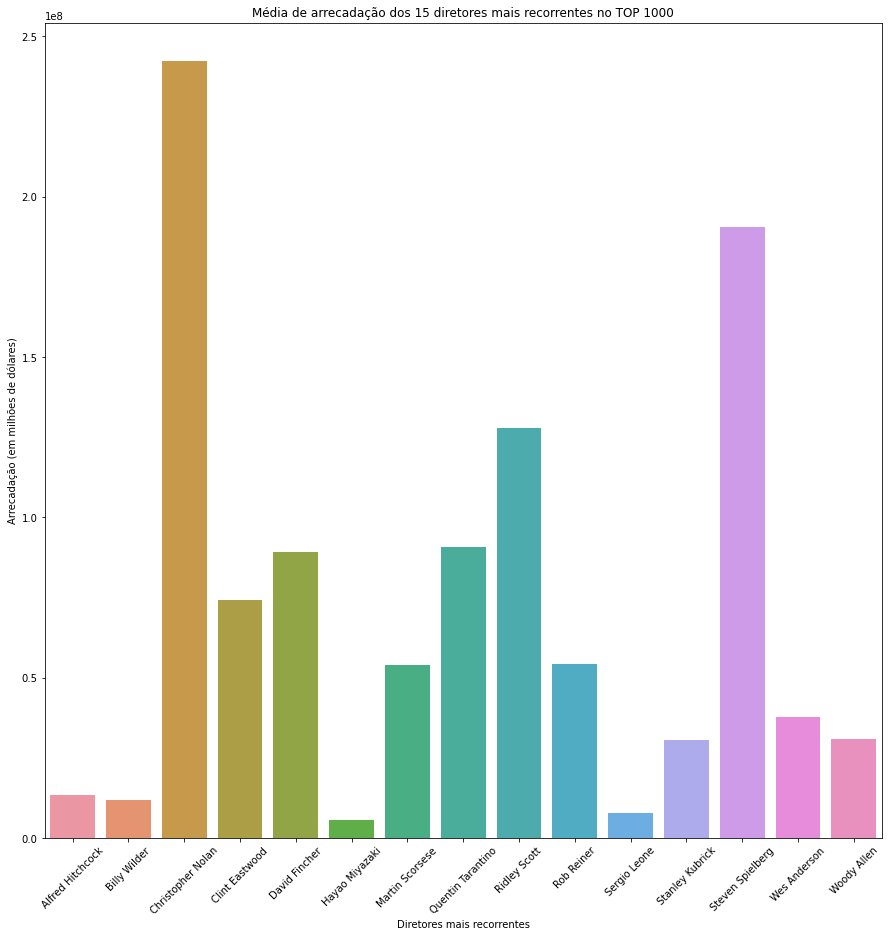

In [184]:
diretores_mais_presentes = df.Director.value_counts().head(15).index

df_diretores_mais_presentes = df[df['Director'].isin(diretores_mais_presentes)]
df_diretores_mais_presentes_media = df_diretores_mais_presentes[['Director','Gross', "IMDB_Rating"]].groupby('Director').mean().reset_index()

plt.figure(figsize=(15, 15))
plt.xticks(rotation=45)

fig = sns.barplot(data=df_diretores_mais_presentes_media, x="Director", y="Gross")

plt.xlabel("Diretores mais recorrentes")
plt.ylabel("Arrecadação (em milhões de dólares)")
plt.title("Média de arrecadação dos 15 diretores mais recorrentes no TOP 1000")

plt.show()

**Comparação das médias de arrecadação dos diretores mais recorrentes vs. diretores menos recorrentes no Top 1000**

In [185]:
media_mais = df_diretores_mais_presentes.Gross.mean()

df_diretores_menos_presentes = df[ ~(df['Director'].isin(diretores_mais_presentes))]
media_menos = df_diretores_menos_presentes.Gross.mean()

locale.setlocale(locale.LC_MONETARY, 'en_US.UTF-8')

print(f'Média diretores menos recorrentes {locale.currency(media_menos, grouping=True)}')
print(f'Média diretores mais recorrentes {locale.currency(media_mais, grouping=True)}')

Média diretores menos recorrentes $70,705,589.34
Média diretores mais recorrentes $78,161,145.40


**Média das notas no IMDB dos 15 diretores mais recorrentes no Top 1000**: Para
a visualização, escolheu-se um gráfico de barras para comparar visualmente as médias das notas dos diferentes diretores mais recorrentes.

Pelo gráfico, nota-se que os diretores mais recorrentes no Top 1000, possuem notas altas, não havendo diferenças significativas entre os diretores.


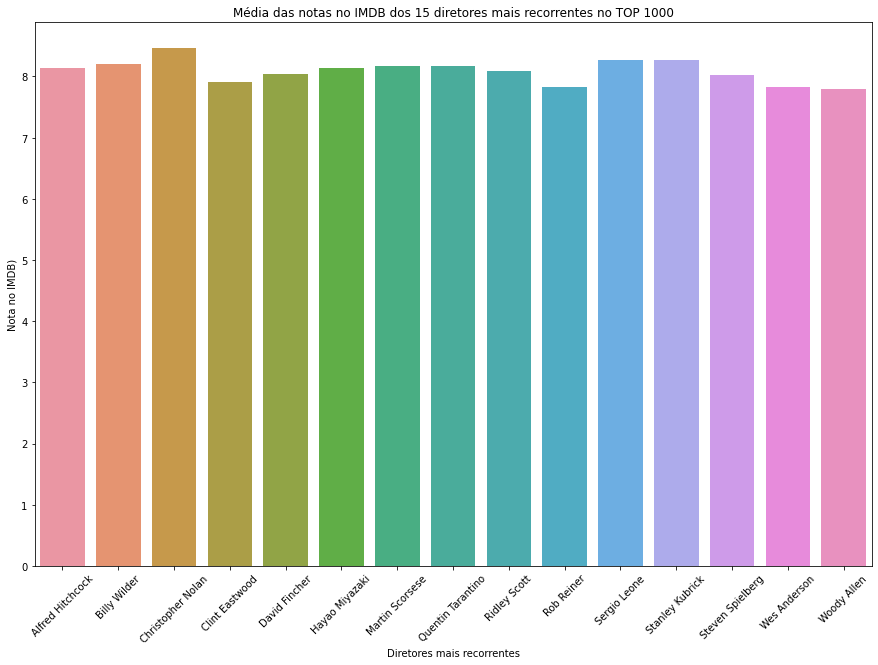

In [186]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation=45)

fig = sns.barplot(data=df_diretores_mais_presentes_media, x="Director", y="IMDB_Rating")

plt.xlabel("Diretores mais recorrentes")
plt.ylabel("Nota no IMDB)")
plt.title("Média das notas no IMDB dos 15 diretores mais recorrentes no TOP 1000")

plt.show()

**Comparação das médias de notas dos diretores mais recorrentes vs. diretores menos recorrentes no Top 1000**

In [187]:
media_mais = df_diretores_mais_presentes.IMDB_Rating.mean()

df_diretores_menos_presentes = df[ ~(df['IMDB_Rating'].isin(diretores_mais_presentes))]
media_menos = df_diretores_menos_presentes.IMDB_Rating.mean()

print(f'Média nota dos diretores menos recorrentes {round(media_menos, 2)}')
print(f'Média nota dos diretores mais recorrentes {round(media_mais, 2)}')

Média nota dos diretores menos recorrentes 7.95
Média nota dos diretores mais recorrentes 8.09


**Média das arrecadações através dos anos de lançamento**: Para
a visualização, escolheu-se um gráfico de linhas para comparar visualmente as médias das arrecadações ao longo do tempo.

Pelo gráfico, nota-se que há uma tendência de aumento das arrecadações ao longo do tempo.


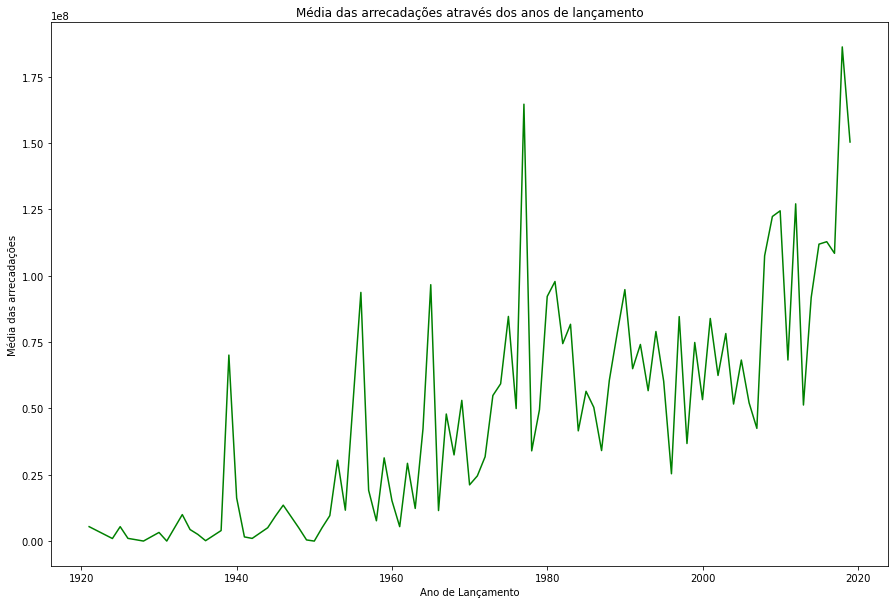

In [188]:
df_years = df[["Released_Year", "Gross"]].groupby('Released_Year').mean().reset_index()

plt.figure(figsize=(15, 10))

plt.xlabel("Ano de Lançamento")
plt.ylabel("Média das arrecadações")
plt.title("Média das arrecadações através dos anos de lançamento")

sns.lineplot(data=df_years, x="Released_Year", y="Gross", color="green")

plt.show()

## 4.3. Análise Multivariada

**Correlação entre as variáveis**: Para a visualização, escolheu-se um mapa de calor para comparar visualmente as correlações.

Pelo gráfico, percebe-se as diferentes correlações entre as variáveis. Destacando-se, IMDB_Rating e No_of_Votes com forte correlação.


Text(0.5, 1.0, 'Correlações entre atributo')

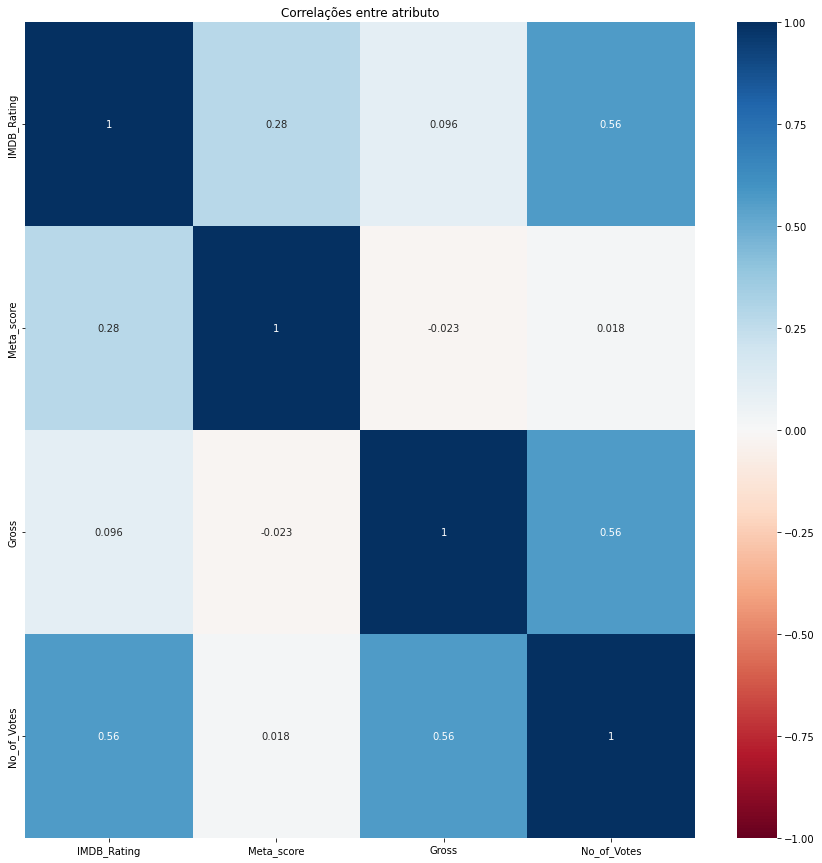

In [189]:
# Mapa de calor das correlações
df_variaveis_numericas = df[["IMDB_Rating", "Meta_score", "Gross", "No_of_Votes"]]
correlations = df_variaveis_numericas.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(correlations, annot=True, cmap='RdBu', vmin=-1.0, vmax=1.0)
plt.title('Correlações entre atributo')

**Correlação entre as variáveis**: Para
a visualização, escolheu-se uma matriz de gráficos de dispersão, em que cada célula da matriz mostra a relação entre duas variáveis com uma linha de regressão linear nos gráficos de dispersão. E os gráficos diagonais exibem histogramas.

Pelo gráfico, percebe-se as diferentes correlações entre as variáveis. Destacando-se, a ausência de uma tendência explícita e clara, parecendo ser distribuições ruidosas.


<Figure size 1080x1080 with 0 Axes>

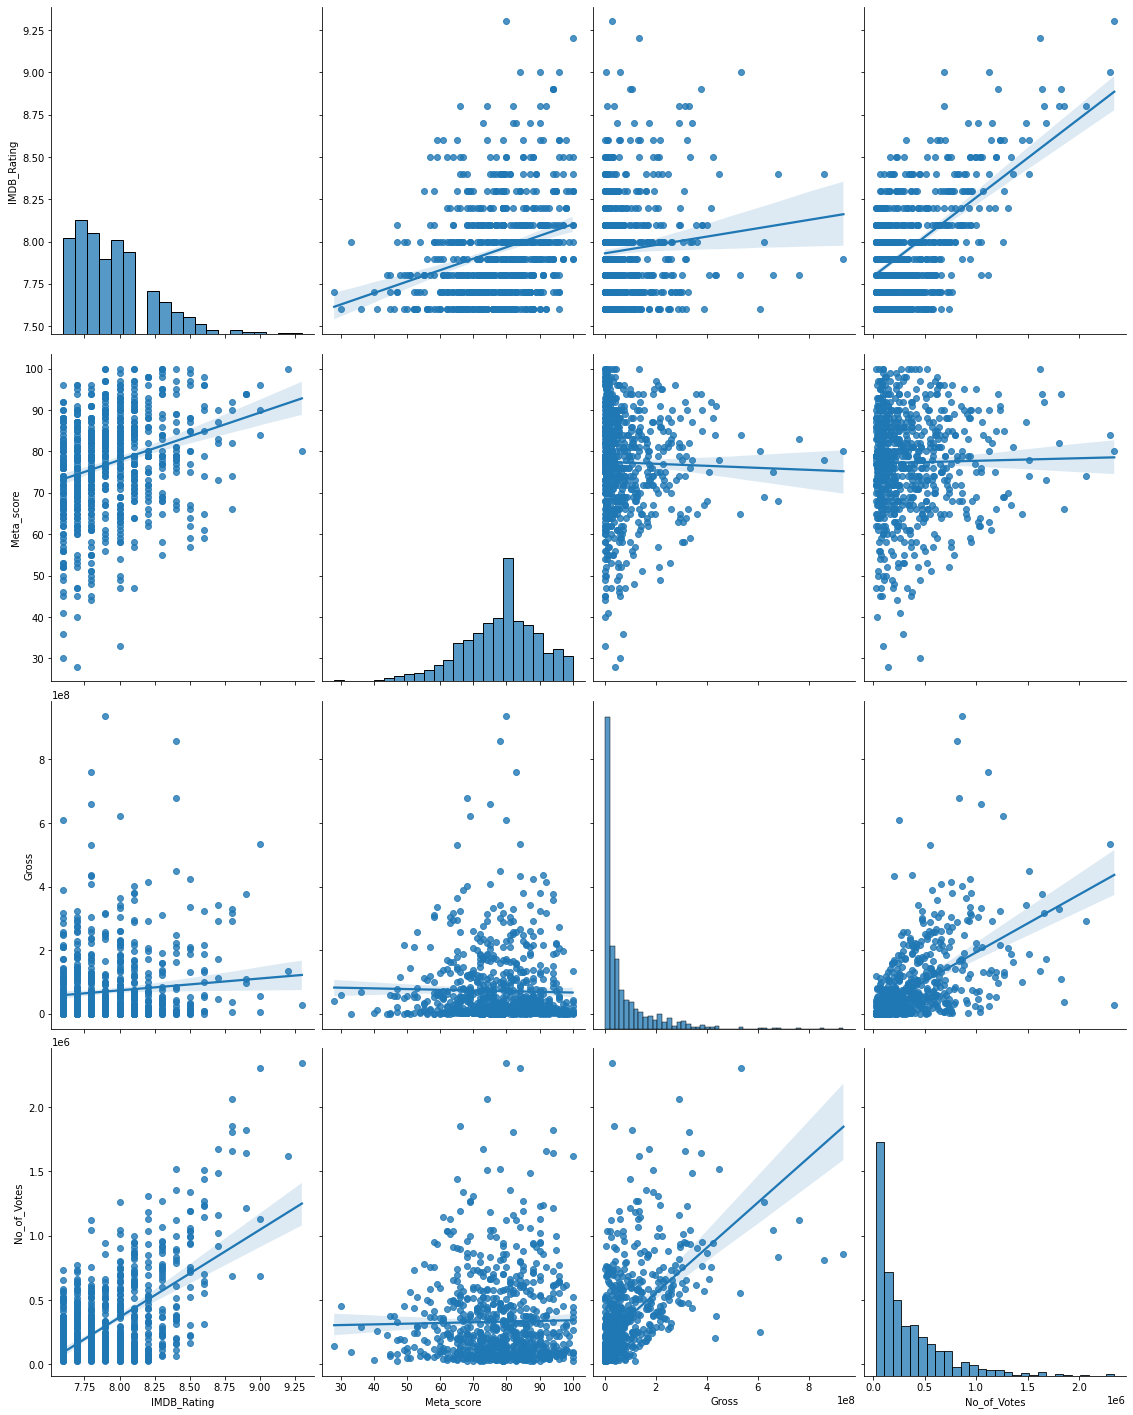

In [190]:
plt.figure(figsize=(15, 15))

sns.pairplot(df_variaveis_numericas, kind="reg", height=5, aspect=.8)  

**Correlação entre Gross e Meta_score**: Para a visualização, escolheu-se uma tabela (matriz de correlações).

Pela tabela, percebe-se ausência de correlação entre as duas variáveis.


In [191]:
df[["Gross", "Meta_score"]].corr()

,Gross,Meta_score
Gross,1.000000,-0.023012
Meta_score,-0.023012,1.000000


**Radar plot**: A visualização multidimensional iterativa escolhia foi o radar plot. O objetivo é que se possa observar como algumas variáveis de interesse afetam os principais filmes (no nosso caso, restringimos para os 10 filmes melhores avaliados na métrica do IMDC). Por exemplo, pode-se observar como que que o tempo de duração do filme se comporta para este grupo selecionado. É entendido que o Radar Plot é uma técnica amplamente questionada, porém como as técnicas de redução de dimensionalidade não se encaixam no problema, este método acabou sendo o mais adequado para a exemplificação de técnicas multidimensionais.

In [192]:
# tratando a base de dados para que seja possivel aplicar o método (ordenando pelo IMDB_Rating e transformando a variável
# Runtime em numérica)

df_sorted = df.sort_values(by='IMDB_Rating', ascending = False)

def extract_minutes(runtime):
    return int(runtime.split(' ')[0])

df_sorted['Runtime (min)'] = df_sorted['Runtime'].apply(extract_minutes)

df_sorted.drop(columns=['Runtime'], inplace=True)
df_sorted.head()

,Series_Title,Released_Year,Certificate,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,difference,Runtime (min)
0,The Shawshank Redemption,1994,A,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0,-0.277778,142
1,The Godfather,1972,A,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,0.058824,175
2,The Dark Knight,2008,UA,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,-0.045752,152
3,The Godfather: Part II,1974,A,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,0.037582,202
4,12 Angry Men,1957,U,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,0.120915,96


In [193]:
# normalizando as variáveis numéricas para a mesma escala, de forma que a visualização por Radar faça sentido

from sklearn.preprocessing import StandardScaler

top10movies = df_sorted[:10]

# Select relevant Runtime (min)
top10movies = top10movies[['IMDB_Rating','Meta_score','No_of_Votes','Gross','Runtime (min)']]
categories = ['IMDB_Rating','Meta_score','No_of_Votes','Gross','Runtime (min)']

scaler = MinMaxScaler()

scaled_top10 = scaler.fit_transform(top10movies)

scaled_top10 = pd.DataFrame(scaled_top10, columns=top10movies.columns)
scaled_top10['Series_Title'] = df['Series_Title']
scaled_top10.head()

,IMDB_Rating,Meta_score,No_of_Votes,Gross,Runtime (min),Series_Title
0,1.0,0.0,1.000000,0.045206,0.433962,The Shawshank Redemption
1,0.8,1.0,0.563223,0.246196,0.745283,The Godfather
2,0.4,0.2,0.975900,1.000000,0.528302,The Dark Knight
3,0.4,0.5,0.266850,0.099793,1.000000,The Godfather: Part II
4,0.4,0.8,0.000879,0.000000,0.000000,12 Angry Men


In [194]:
# definindo a sequência de cores do Radar Plot

color_sequence = ['#0000FF', '#4DFF00', '#FFA500', '#FF00AA', '#00FFFF', '#800080', '#FFD700', '#00FF00', '#FF0000', '#4169E1']


In [195]:
# plot do gráfico interativob

import plotly.graph_objects as go

fig = go.Figure()

n_samples = len(scaled_top10)

# Create a color gradient using a colormap and reverse it
colors = cm.jet(np.linspace(0, 1, n_samples))[::-1]

for i in range(n_samples):
    data_point = scaled_top10.iloc[i]
    fig.add_trace(go.Scatterpolar(
        r=list(data_point[:8]),  
        theta=categories,
        fill='toself',
        name=data_point['Series_Title'],
        line=dict(color=color_sequence[i])
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[scaled_top10.select_dtypes(include='number').min().min(), scaled_top10.select_dtypes(include='number').max().max()]
        )),
    showlegend=True
)

fig.show()

Dessa forma, o usuário tem liberdade para interagir com os filmes e observar o comportamento das principais variáveis entre eles. Um exemplo de análise em conjunta com a interação pode ser observado ao tomar os dois principais filmes ('The Shawshank Redemption' e 'The Godfather'), por mais que o IMDB_Rating seja parecido, um obteve a maior nota do top 10 na categoria Meta_score enquanto o outro recebeu a menor, destacando a diferença entre os meios de avaliação.

---

# 5. Interação com Dash

In [196]:
import dash
from dash import dcc, html
import plotly.graph_objs as go

In [197]:
app = dash.Dash("IMDB Analysis")

In [198]:
analise_univariada = [
    html.H2(
        "Análise Univariada",
        style={
            "text-align": "center",
            "color": "#AC3B61",
            "font-size": "25px",
        },
    ),
    html.H3(
        "Variáveis Categóricas",
        style={
            "text-align": "left",
            "color": "#AC3B61",
            "text-decoration": "underline",
            "margin-left": "5%",
            "font-size": "20px",
        },
    ),
    # Pie Chart with Certificate
    html.Div(
        [dcc.Graph(figure=pie_certificate)],
        style={
            "border-radius": "10px",
            "background-color": "#123C69",
            "margin-bottom": "20px",
            "margin-right": "20px",
            "margin-left": "20px",
            "padding": 10,
            "width": "45%",
            "vertical-align": "middle",
            "display": "inline-block",
        },
    ),
    # Pie Chart with Genre
    html.Div(
        [dcc.Graph(figure=pie_genre)],
        style={
            "border-radius": "10px",
            "background-color": "#123C69",
            "margin-bottom": "20px",
            "margin-left": "20px",
            "padding": 10,
            "width": "45%",
            "vertical-align": "middle",
            "display": "inline-block",
        },
    ),
    html.H3(
        "Variáveis Númericas",
        style={
            "text-align": "left",
            "color": "#AC3B61",
            "margin-left": "5%",
            "text-decoration": "underline",
            "font-size": "20px",
        },
    ),
    # Years Graph
    html.Div(
        [dcc.Graph(figure=years_graph)],
        style={
            "border-radius": "10px",
            "background-color": "#123C69",
            "margin-bottom": "10%",
            "margin-left": "1%",
            "padding": 10,
            "display": "inline-block",
            "width": "45%",
            "vertical-align": "middle",
        },
    ),
    # Choice of Distribution
    html.Div(
        [
            dcc.Dropdown(
                id="distributions-dropdown",
                options=[
                    {"label": "Notas do IMDB", "value": "IMDB_Rating"},
                    {"label": "Notas do MetaCritic", "value": "Meta_score"},
                    {"label": "Diferença entre IMDB e MetaCritic", "value": "Diff"},
                    {"label": "Número de Votos", "value": "Votes"},
                    {"label": "Arrecadação", "value": "Gross"},
                ],
                value="IMDB_Rating",
                style={
                    "width": "50%",
                    "margin-left": "25%",
                    "margin-bottom": "1%",
                    "vertical-align": "middle",
                    "horizontal-align": "middle",
                },
            ),
            dcc.Graph(
                id="distribution-graph",
            ),
        ],
        style={
            "border-radius": "10px",
            "background-color": "#123C69",
            "margin-bottom": "10%",
            "margin-left": "4%",
            "padding": 10,
            "display": "inline-block",
            "width": "45%",
            "vertical-align": "middle",
        },
    ),
]

In [199]:
app = dash.Dash("IMDB Analysis")

app.layout = html.Div(
    children=[
        html.H1(
            "Dashboard Filmes do IMDB",
            style={
                "text-align": "center",
                "color": "#AC3B61",
                "font-size": "50px",
                "margin-top": "0%",
            },
        ),
        *analise_univariada,
    ],
    style={
        "backgroundColor": "#EDC7B7",
    },
)

@app.callback(
    dash.dependencies.Output("distribution-graph", "figure"),
    [dash.dependencies.Input("distributions-dropdown", "value")],
)
def update_graph_distributions(column):
    if column == "Meta_score":
        return metacritic_hist
    elif column == "Gross":
        return gross_hist
    elif column == "Diff":
        return diff_hist
    elif column == "Votes":
        return votes_hist
    else:
        return imdb_hist
    
app.run(debug=True, jupyter_mode="external")

Dash app running on http://127.0.0.1:8050/
